<a href="https://colab.research.google.com/github/tonykks/2024_mirae_master/blob/main/%EC%A0%9C%EC%A3%BC_%ED%8F%AD%EC%97%BC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#라이브러리 설치 :  EXCEL 파일 읽기 위해 필요
!pip install openpyxl

In [3]:
# Load the Excel file to inspect the contents for appropriate data selection and visualization
file_path = './df_jeju_final.xlsx'
df = pd.read_excel(file_path)

# Displaying the first few rows to understand the structure
df.head()


,일시,지점,폭염,최고체감온도,최고기온,평균기온,최저기온,평균상대습도,폭염특보,폭염영향예보(단계),열대야,자외선지수
0,2019-05-01,제주(184),0,20.0,18.6,14.7,12.4,74.6,0,,0,높음
1,2019-05-02,제주(184),0,21.7,21.5,17.2,12.8,40.9,0,,0,매우높음
2,2019-05-03,제주(184),0,22.3,21.9,18.9,16.0,49.0,0,,0,매우높음
3,2019-05-04,제주(184),0,22.1,23.3,19.2,14.7,48.0,0,,0,매우높음
4,2019-05-05,제주(184),0,22.2,22.2,19.0,16.4,51.9,0,,0,높음


In [5]:
# 한글 폰트 설치
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# matplotlib 설정 변경
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 한글 폰트를 matplotlib의 기본 폰트로 설정
plt.rcParams['font.family'] = 'NanumGothic'


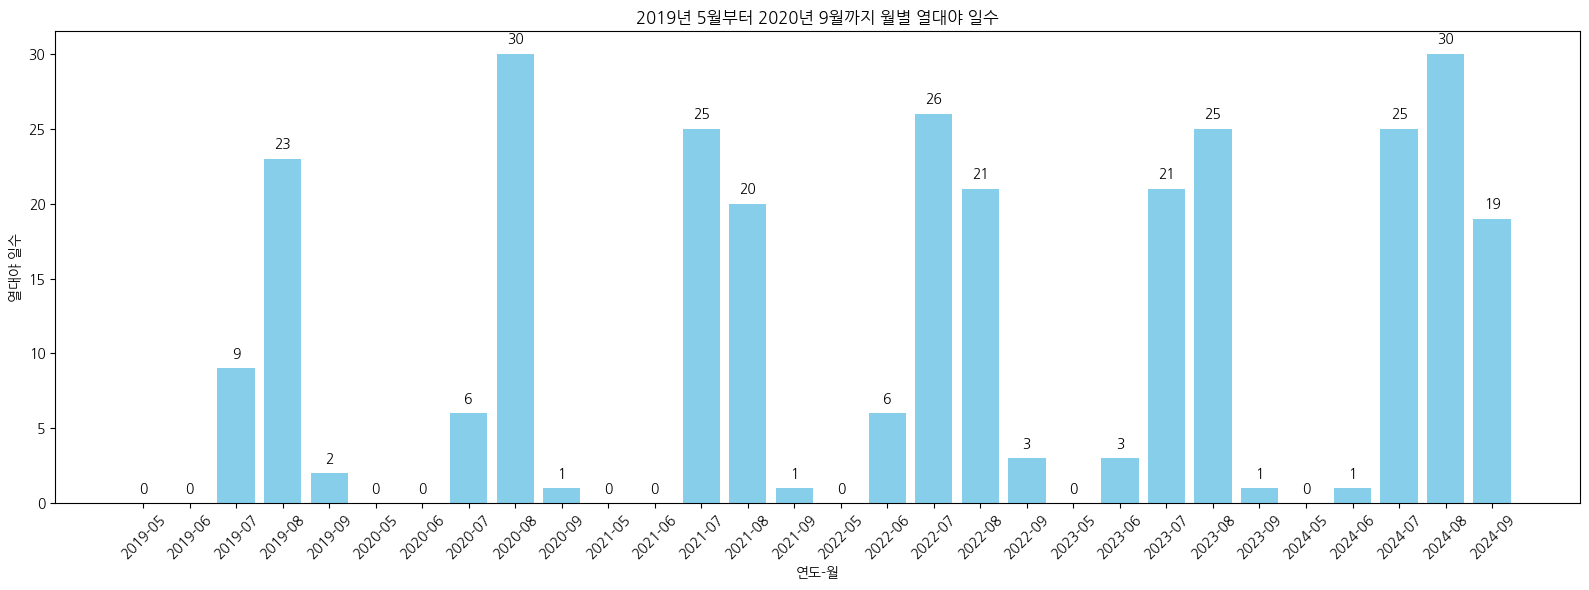

In [6]:
# Convert the '일시' column to datetime for easier grouping by year and month
df['일시'] = pd.to_datetime(df['일시'])

# Group by year and month, then sum the '열대야' counts
monthly_heat_counts = df.groupby(df['일시'].dt.to_period('M'))['열대야'].sum().reset_index()
monthly_heat_counts['일시'] = monthly_heat_counts['일시'].dt.strftime('%Y-%m')

# Plotting
plt.figure(figsize=(16, 6))
plt.bar(monthly_heat_counts['일시'], monthly_heat_counts['열대야'], color='skyblue')
plt.title("2019년 5월부터 2020년 9월까지 월별 열대야 일수")
plt.xlabel("연도-월")
plt.ylabel("열대야 일수")

# Annotate each bar with the count
for i, value in enumerate(monthly_heat_counts['열대야']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


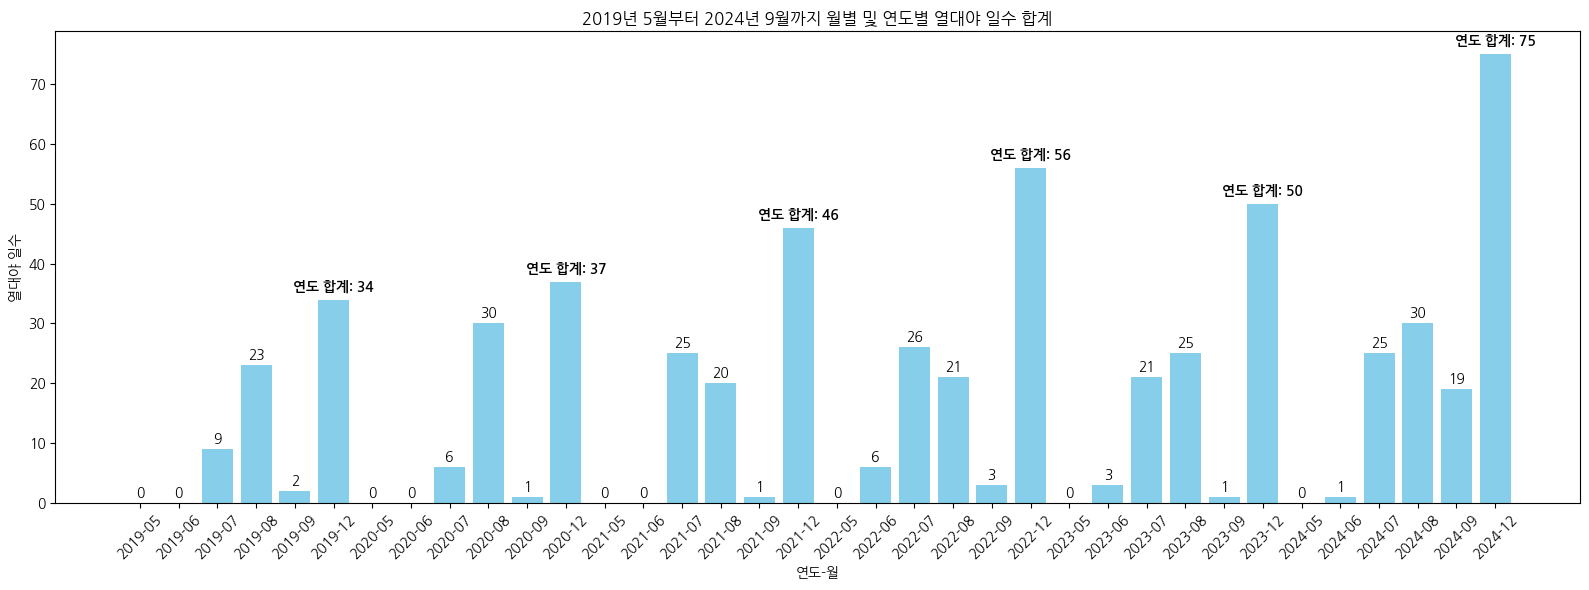

In [7]:
# First, calculate the annual sum of '열대야' and append it as a new row after each year's data.

# Convert '일시' back to datetime for grouping
monthly_heat_counts['일시'] = pd.to_datetime(monthly_heat_counts['일시'])

# Calculate the yearly sum of 열대야
annual_heat_counts = monthly_heat_counts.groupby(monthly_heat_counts['일시'].dt.year)['열대야'].sum().reset_index()
annual_heat_counts['일시'] = pd.to_datetime(annual_heat_counts['일시'].astype(str) + '-12-31')

# Append yearly totals to the original data
combined_counts = pd.concat([monthly_heat_counts, annual_heat_counts], ignore_index=True).sort_values(by='일시')
combined_counts.reset_index(drop=True, inplace=True)

# Create labels for displaying the year totals
combined_counts['label'] = combined_counts.apply(
    lambda row: str(row['열대야']) if row['일시'].month == 12 else '', axis=1
)

# Plotting the modified bar chart with yearly totals
plt.figure(figsize=(16, 6))
plt.bar(combined_counts['일시'].dt.strftime('%Y-%m'), combined_counts['열대야'], color='skyblue')
plt.title("2019년 5월부터 2024년 9월까지 월별 및 연도별 열대야 일수 합계")
plt.xlabel("연도-월")
plt.ylabel("열대야 일수")

# Annotate each bar with the count
for i, (value, label) in enumerate(zip(combined_counts['열대야'], combined_counts['label'])):
    if label:  # Only add the label for yearly totals
        plt.text(i, value + 1, f'연도 합계: {label}', ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


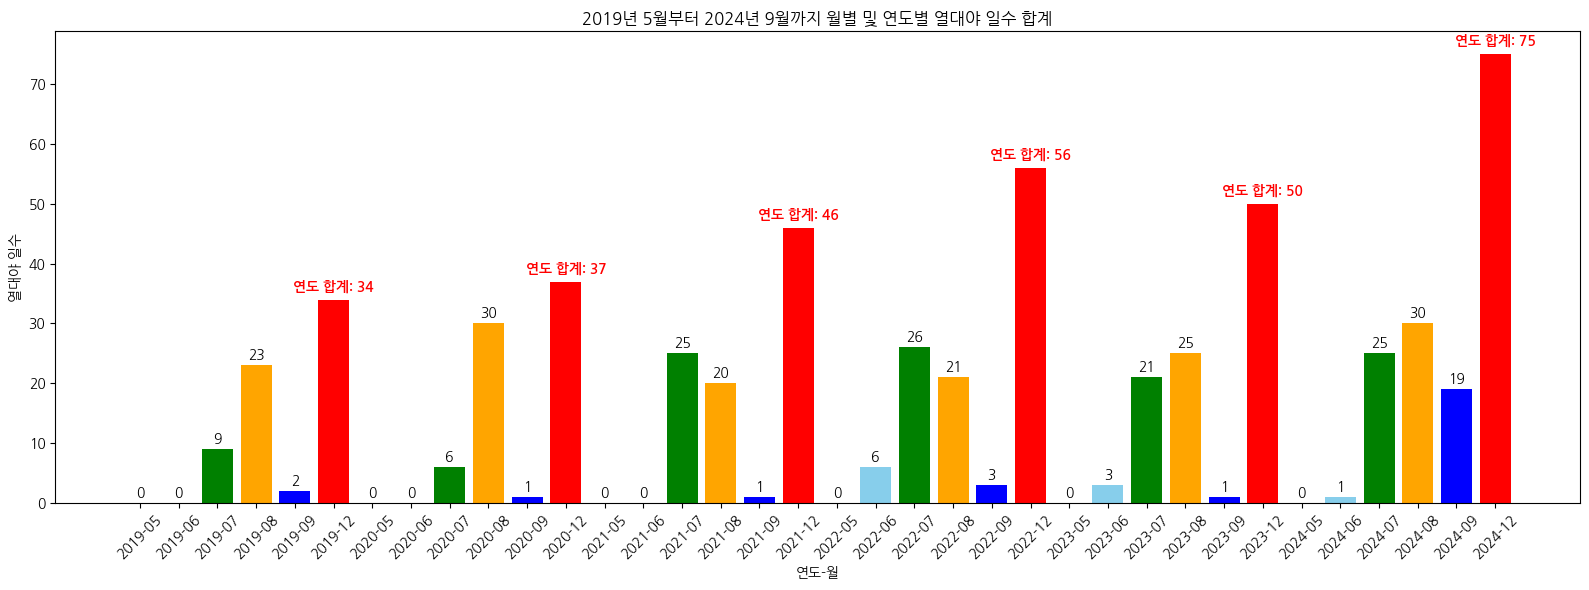

In [8]:
# Redefining the plot with specific colors for July, August, September, and the annual total in December.

# Color scheme for months and year-end totals
colors = []
for date in combined_counts['일시']:
    if date.month == 7:      # July - green
        colors.append('green')
    elif date.month == 8:    # August - orange
        colors.append('orange')
    elif date.month == 9:    # September - blue
        colors.append('blue')
    elif date.month == 12:   # Year-end total - red
        colors.append('red')
    else:                    # Other months - default color
        colors.append('skyblue')

# Plotting with the updated color scheme
plt.figure(figsize=(16, 6))
plt.bar(combined_counts['일시'].dt.strftime('%Y-%m'), combined_counts['열대야'], color=colors)
plt.title("2019년 5월부터 2024년 9월까지 월별 및 연도별 열대야 일수 합계")
plt.xlabel("연도-월")
plt.ylabel("열대야 일수")

# Annotate each bar with the count, emphasizing yearly totals
for i, (value, label, month) in enumerate(zip(combined_counts['열대야'], combined_counts['label'], combined_counts['일시'].dt.month)):
    if label:  # Add label for yearly totals in bold red
        plt.text(i, value + 1, f'연도 합계: {label}', ha='center', va='bottom', fontweight='bold', color='red')
    else:
        plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


위의 그래프는 기후 온난화의 영향으로 최근 몇 년 동안 열대야 일수가 증가하고 있음을 보여줍니다. 특히 여름철인 7월, 8월, 9월에 열대야가 발생하는 횟수가 지속적으로 증가하고 있으며, 이를 통해 열대야 현상이 점차 심화되고 있음을 알 수 있습니다. 그래프에서 각 해의 총 열대야 일수를 빨간색으로 강조하여 연도별 증가 추세를 쉽게 파악할 수 있게 하였습니다.

기후 온난화와 열대야 증가
기후 온난화는 대기 중 온실가스 농도의 증가로 인한 지구 평균 기온 상승을 의미하며, 이는 여름철 기온을 높이는 데 기여하여 밤에도 기온이 내려가지 않는 열대야 현상을 더욱 빈번하게 발생시킵니다. 이러한 열대야의 증가는 시민들의 수면의 질을 떨어뜨리고, 건강에 부정적인 영향을 미칠 수 있습니다. 특히 2022년과 2024년에 열대야 일수가 급격히 증가한 점은 이러한 현상이 심각해지고 있음을 나타냅니다.

이 그래프는 기후 변화의 실질적인 영향을 시각적으로 보여주며, 앞으로의 대비와 대책 마련의 필요성을 강조하는 자료로 활용될 수 있습니다. ​